In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
data = pd.read_csv('Avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.7+ MB


In [16]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


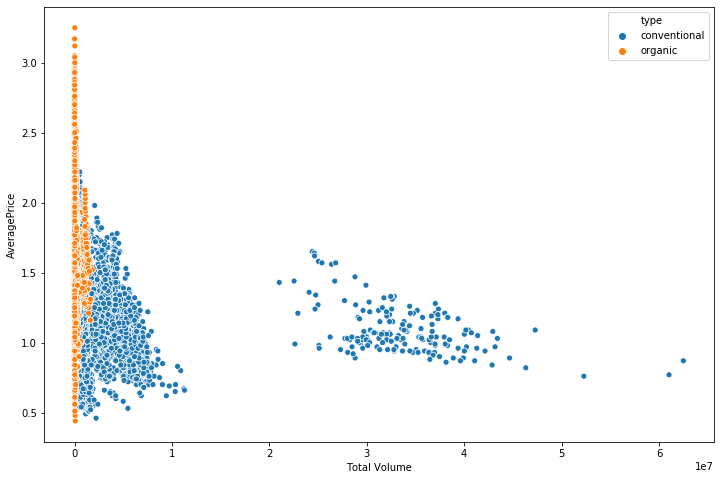

In [5]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= data)

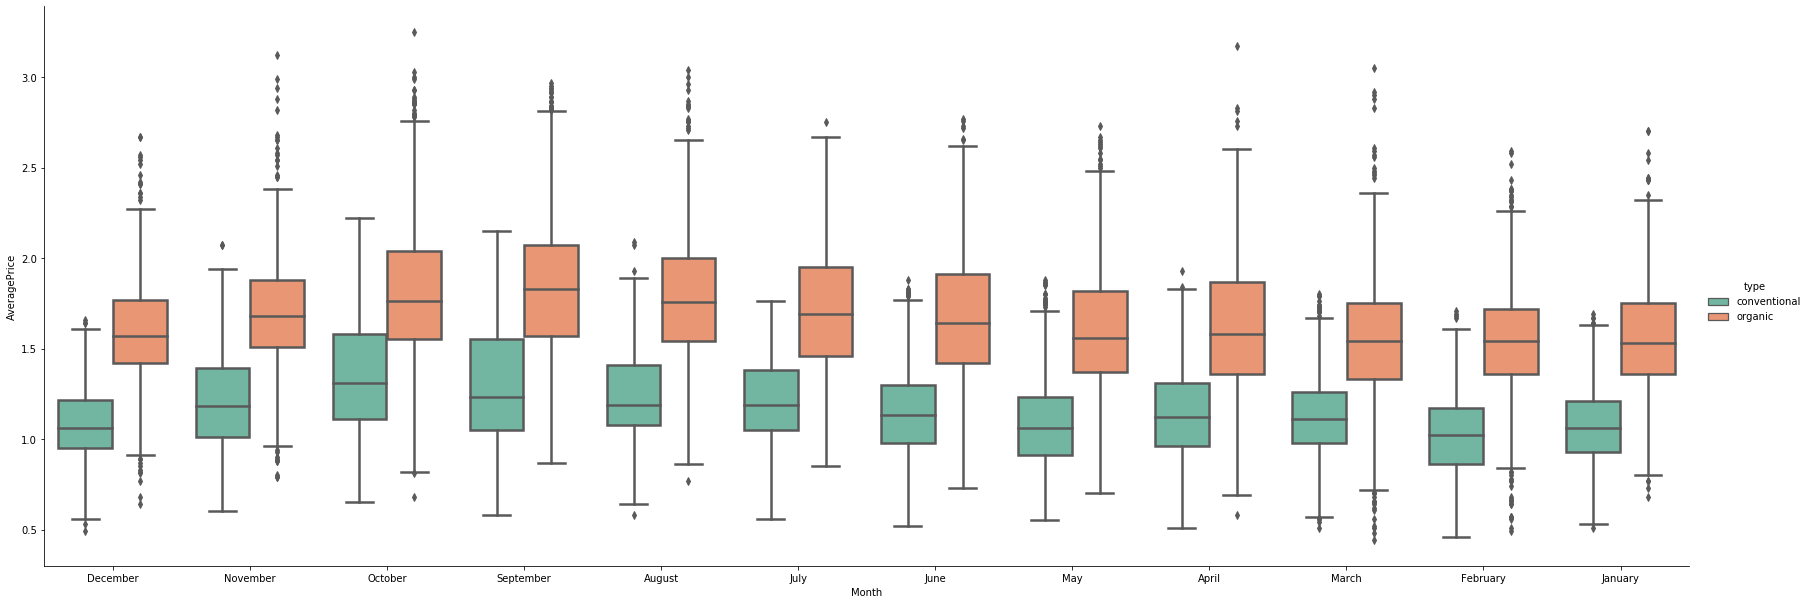

In [4]:
data['Year'], data['Month'],  data['Day'] = data['Date'].str.split('-').str
mounth = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', 
                                   '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', 
                                   '11': 'November', '12': 'December'}
data['Month'] = data['Month'].map(mounth)

ax = sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=data, height=8.5, linewidth=2.5, aspect=2.8,palette="Set2");

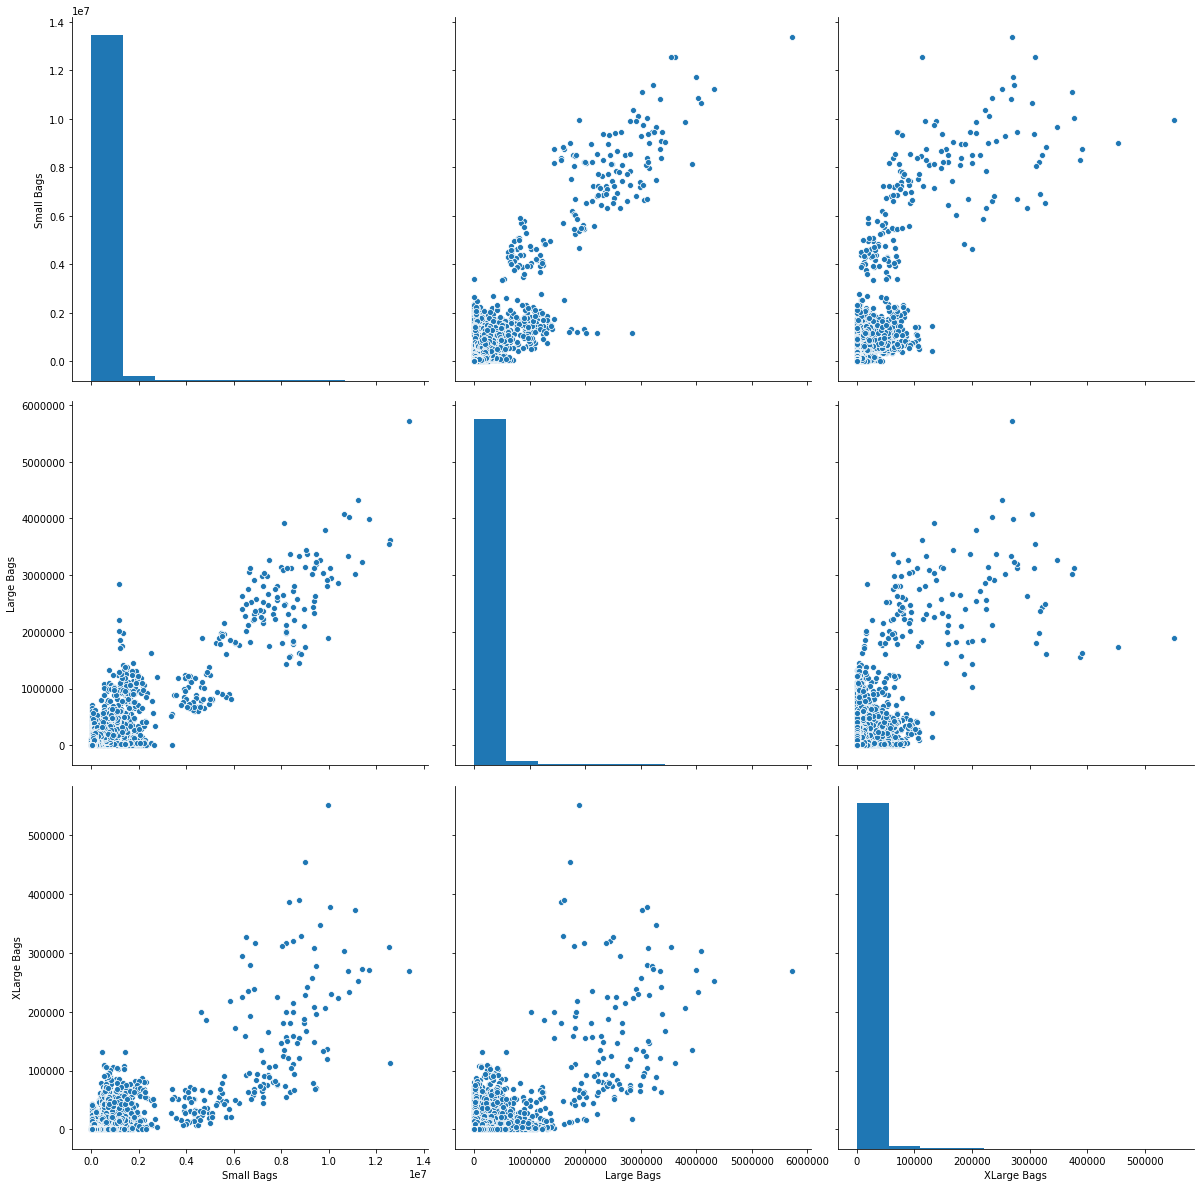

In [6]:
sns.pairplot(data.iloc[:,8:11], palette="husl",height=5.5)

In [12]:
data.iloc[0:2,8:11]

,Small Bags,Large Bags,XLarge Bags
0,8603.62,93.25,0.0
1,9408.07,97.49,0.0


In [17]:
data.loc[0:1,'Total Bags':'Large Bags']

,Total Bags,Small Bags,Large Bags
0,8696.87,8603.62,93.25
1,9505.56,9408.07,97.49


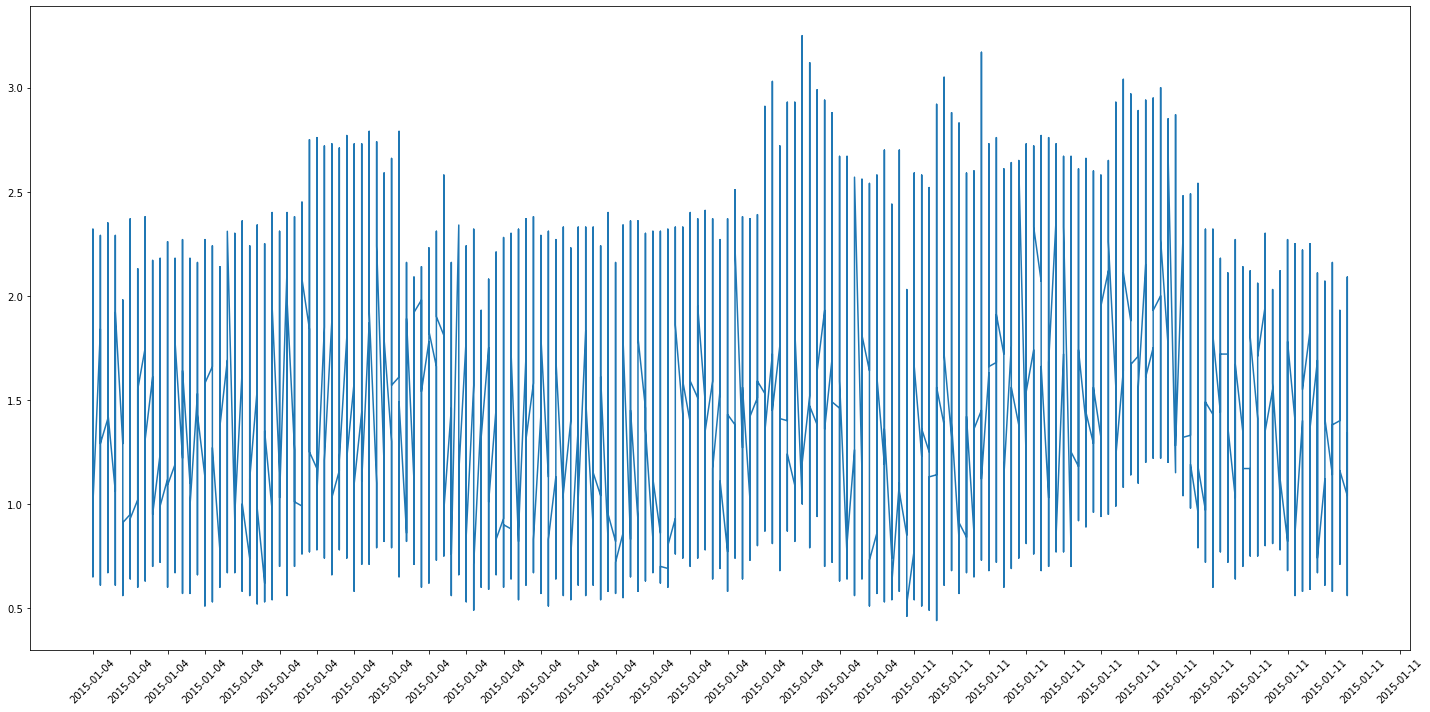

In [11]:
data = data.sort_values('Date')
plt.figure(figsize=(20,10))
plt.xticks(np.arange(data.shape[0])[::5], data.Date[::5], rotation = 45)
plt.plot(data['Date'], data['AveragePrice'])
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()

Text(0.5, 1.0, 'Average of Total Volume According to Region')

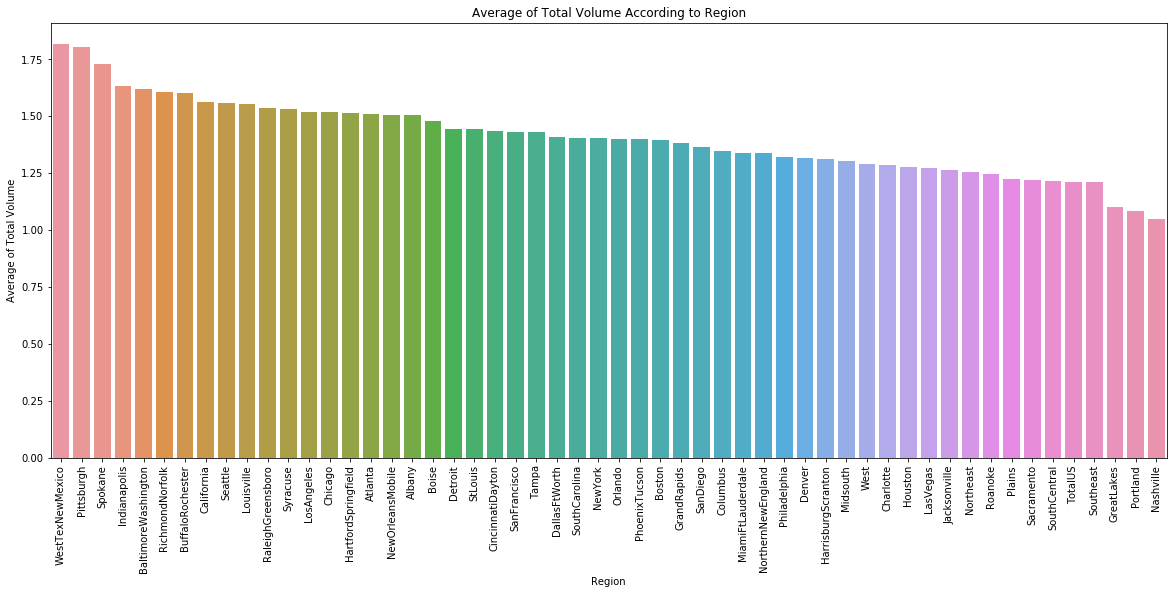

In [71]:
region=list(set(data['region']))
average_region=[]
for i in region:
    df=data[data.region==i]
    x=sum(df.AveragePrice)/len(df)
    average_region.append(x)
average_region.sort(reverse=True)
plt.figure(figsize=(20,8))
sns.barplot(region,average_region)
plt.xticks(rotation=90);
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

### Machines learning 

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC,SVR
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
le = LabelEncoder()
data['cyear'] = le.fit_transform(data.year)
data['ca'] = le.fit_transform(data.AveragePrice)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.cyear,data.ca,random_state=0)

In [6]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit(X_train)
X_trains= minmax.transform(X_train)
X_tests= minmax.transform(X_test)

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[1,10,30,40,70,100],'max_depth':[0.001,0.01,0.1,1,10,100]}
gridcv = GridSearchCV(RandomForestRegressor(),param_grid,cv=5)
gridcv.fit(X_train,y_train)
gridcv.score(X_test,y_test)

0.03611551803989799

In [42]:
rfr= RandomForestRegressor(n_estimators=100,max_depth=100)
rfr.fit(X_train,y_train)
print('train score:',rfr.score(X_train,y_train))
print('test score:',rfr.score(X_test,y_test))

train score: 0.034007299133397395
test score: 0.03604954614450029


In [52]:
rfr.predict(np.array([[2020]]))

array([86.68804453])